In [1]:

import numpy as np
import os, glob, pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-failure-clinical-data' dataset.
Path to dataset files: /kaggle/input/heart-failure-clinical-data


In [3]:
df = pd.read_csv(os.path.join(path, "heart_failure_clinical_records_dataset.csv"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Checking for any Null Values (Data Cleaning)

In [4]:
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [5]:
df.shape

(299, 13)

Checking for Outliers (Data Cleaning)

In [6]:
non_binary_columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
quartile_1 = df[non_binary_columns].quantile(0.25)
quartile_3 = df[non_binary_columns].quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - 1.5 * iqr
upper_bound = quartile_3 + 1.5 * iqr

outliers = (df[non_binary_columns] < lower_bound) | (df[non_binary_columns] > upper_bound)
outliers_count = outliers.sum()

print("Number of outliers in each column:")
print(outliers_count)


Number of outliers in each column:
creatinine_phosphokinase    29
ejection_fraction            2
platelets                   21
serum_creatinine            29
serum_sodium                 4
dtype: int64


In [7]:
df['outlier_check'] = outliers.any(axis=1)

In [8]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,outlier_check
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,False
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,True
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,False
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,False
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,False
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,True
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,True
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,True


In [9]:
df_clean = df.loc[~df['outlier_check']].drop(columns='outlier_check').reset_index(drop=True)

In [10]:
df_clean

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
3,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
4,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
220,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
221,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
222,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [11]:
df_clean.shape

(224, 13)

KNN

In [13]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


In [14]:
# Train, Validation, Test Split
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# helper function for evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import sys
sys.path.append('../')

numerical_features = X_train.columns.tolist()

# Create a preprocessor to scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Init Pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define Hyperparameter Grid
param_grid_knn = {
    'classifier__n_neighbors': [5, 7, 10, 13, 15, 18, 20, 25, 30, 40, 50, 65],
    'classifier__metric': ['euclidean', 'manhattan']
}
# Set up 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch
grid_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

print("\nGrid search complete!")
print("Best params:", grid_knn.best_params_)
print("Best ROC-AUC:", grid_knn.best_score_)

results_df = pd.DataFrame(grid_knn.cv_results_)
print("\nAll cross-validation results:")
print(results_df[['param_classifier__n_neighbors', 'param_classifier__metric', 'mean_test_score']].sort_values('mean_test_score', ascending=False))
tuned_knn_model = grid_knn.best_estimator_

# Make predictions on validation set
y_val_pred_tuned_dt = tuned_knn_model.predict(X_val)
y_val_pred_proba_tuned_dt = tuned_knn_model.predict_proba(X_val)[:, 1]

# Evaluate the tuned model
evaluate_model(y_val, y_val_pred_tuned_dt, y_val_pred_proba_tuned_dt, model_name="Tuned KNN Model")



Grid search complete!
Best params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 65}
Best ROC-AUC: 0.8757204861111111

All cross-validation results:
    param_classifier__n_neighbors param_classifier__metric  mean_test_score
23                             65                manhattan         0.875720
11                             65                euclidean         0.872141
18                             20                manhattan         0.855678
20                             30                manhattan         0.854612
22                             50                manhattan         0.853538
19                             25                manhattan         0.851749
10                             50                euclidean         0.848018
9                              40                euclidean         0.847485
17                             18                manhattan         0.838900
8                              30                euclidean         0.8358

PCA

Explained variance ratio per PC:
PC1: 0.1382
PC2: 0.1235
PC3: 0.1200
PC4: 0.0941
PC5: 0.0831
PC6: 0.0764
PC7: 0.0692
PC8: 0.0656
PC9: 0.0594
PC10: 0.0547
PC11: 0.0502
PC12: 0.0394
PC13: 0.0262


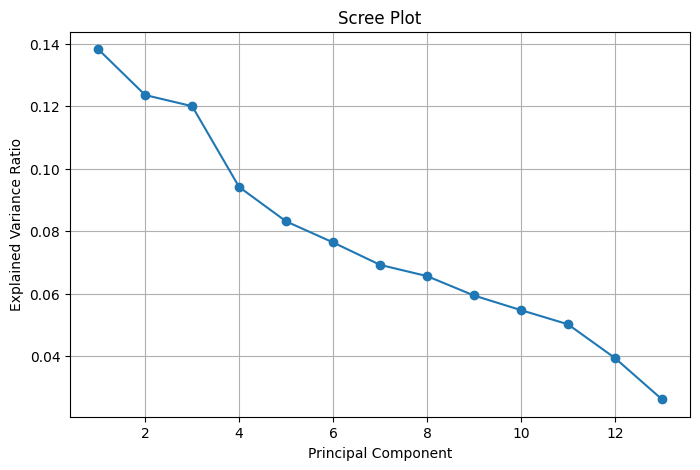

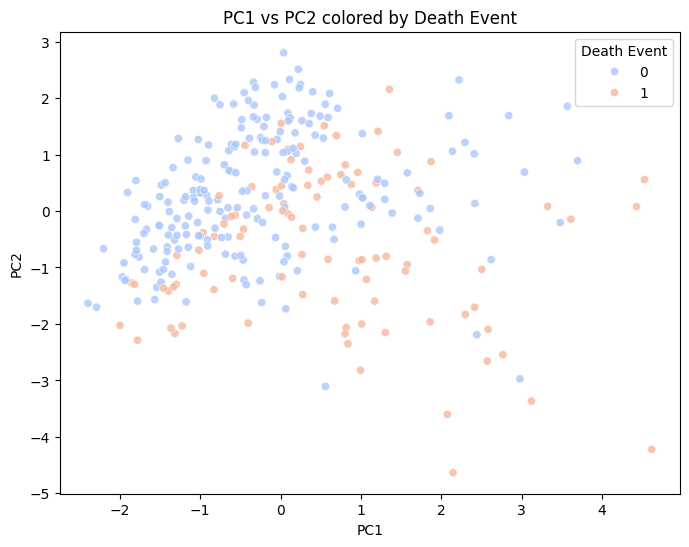

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# View explained variance
explained_var = pca.explained_variance_ratio_

print("Explained variance ratio per PC:")
for i, var in enumerate(explained_var, start=1):
    print(f"PC{i}: {var:.4f}")

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# PC1 vs PC2 scatter plot
pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Death Event": y
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Death Event",
    palette="coolwarm",
    alpha=0.8
)
plt.title("PC1 vs PC2 colored by Death Event")
plt.show()
